# Ejercicio 14

Se debían hacer los ejercicios del notebook de cross-validation. Copié el notebook y los ejercicios están al final. Para que funcione deben tener el archivo 'Cars93.csv' en la misma carpeta, este lo pueden encontrar en la sección '06.RegresionLineal' o en 'soluciones'.

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
import sklearn.model_selection

# Bootstrapping

Una parte central de cualquier modelo estadístico es poder calcular la incertidumbre asociada a sus parámetros.
En los métodos MCMC las incertidumbres se pueden calcular numéricamente. ¿Pero qué hacer con otros métodos que no son Bayesianos?

Una de las posibilidades es utilizar el bootstrap. El poder de este método es que es aplicable cuando no hay herramientas analíticas
disponibles. Además es muy fácil de implementar. En el bootstrap se toman los datos originales y se toman subconjuntos de manera
aleatoria. Cada uno de estos subconjuntos se procesa bajo el método de interés. De esta manera, para cada subconjunto de datos
hay unos parámetros estimados. Al final se hacen los histogramas de los parámetros obtenidos de los diferentes conjuntos y estos
van a dar una idea de las incertidumbres.

Esto proceso no es necesario con un método como mínimos cuadrados porque para este método
ya hay estimadores para las incertidumbres, de todas formas vamos a utilizarlo para demostrar el uso de bootstraping.

Vamos a volver a los datos de precios de carros.

In [11]:
data = pd.read_csv('Cars93.csv')

Vamos a ajustar el modelo lineal `Price` = $\beta_0$ + $\beta_1\times$ `Horsepower` + $\beta_2\times$ `Turn.circle`

In [12]:
X = data[['Horsepower', 'Turn.circle']]
Y = data['Price'].values.reshape(-1,1)

Ahora vamos a dividir los datos en 2 grupos: `test` y `validation`. Para eso usamos `sklearn.model_selection.train_test_split`

In [13]:
X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y,
                                                                                        test_size=0.5)

`train` vamos a usarlo para encontrar los $\beta_i$ y `validation` para medir $R^2$. 

In [14]:
linear = sklearn.linear_model.LinearRegression()
linear.fit(X_train, Y_train)
beta0 = linear.intercept_[0]
beta1 = linear.coef_[0][0]
beta2 = linear.coef_[0][0]
r2_train = linear.score(X_train, Y_train)
r2_validation = linear.score(X_validation, Y_validation) 
print('betas:', beta0, beta1, beta2)
print('R2 (train vs. validation)', r2_train, r2_validation)

betas: -2.577923674488776 0.15630474941294165 0.15630474941294165
R2 (train vs. validation) 0.8176014547533221 0.46766875773848277


Esto lo podemos repetir muchas veces:

In [15]:
for i in range(10):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta0 = linear.intercept_[0]
    beta1 = linear.coef_[0][0]
    beta2 = linear.coef_[0][0]
    r2_train = linear.score(X_train, Y_train)
    r2_validation = linear.score(X_validation, Y_validation) 
    print('ITERACION ', i)
    print('\t betas:', beta0, beta1, beta2)
    print('\t R2 (train vs. validation)', r2_train, r2_validation)

ITERACION  0
	 betas: -13.473384062463165 0.13189747643388428 0.13189747643388428
	 R2 (train vs. validation) 0.7414046048020417 0.45690587661262627
ITERACION  1
	 betas: -1.639605642658097 0.15457829511584287 0.15457829511584287
	 R2 (train vs. validation) 0.737020763983403 0.5210766569488016
ITERACION  2
	 betas: 11.265109047742577 0.15442085261760888 0.15442085261760888
	 R2 (train vs. validation) 0.5499183371586961 0.7103536460879688
ITERACION  3
	 betas: 21.664691317670368 0.1890567617502749 0.1890567617502749
	 R2 (train vs. validation) 0.6076847185337204 0.5792032404323904
ITERACION  4
	 betas: 16.323284592701103 0.16404707666411406 0.16404707666411406
	 R2 (train vs. validation) 0.4639188984615 0.7872872483589326
ITERACION  5
	 betas: -1.0389296477411634 0.15207030306297972 0.15207030306297972
	 R2 (train vs. validation) 0.6027699927785694 0.6569403631992548
ITERACION  6
	 betas: 1.7570528844765079 0.1233557526197135 0.1233557526197135
	 R2 (train vs. validation) 0.597592792356

Hecho de una manera más sistemática y para tener la posibilidad de preparar gráficas, vamos a hacerlo `5000` veces

In [16]:
n_boot = 5000
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
r2_train = np.ones(n_boot)
r2_validation = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y, test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    r2_train[i] = linear.score(X_train, Y_train)
    r2_validation[i] = linear.score(X_validation, Y_validation)

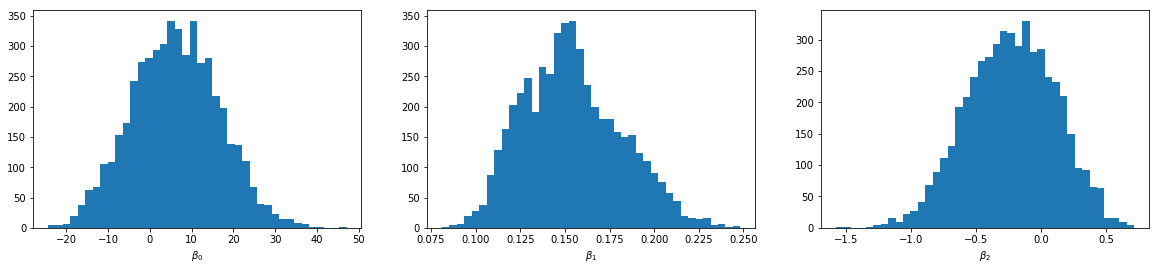

In [17]:
plt.figure(figsize=(20,4))

plt.subplot(131)
_ = plt.hist(beta_0, bins=40)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(132)
_ = plt.hist(beta_1, bins=40)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(133)
_ = plt.hist(beta_2, bins=40)
_ = plt.xlabel(r'$\beta_2$')

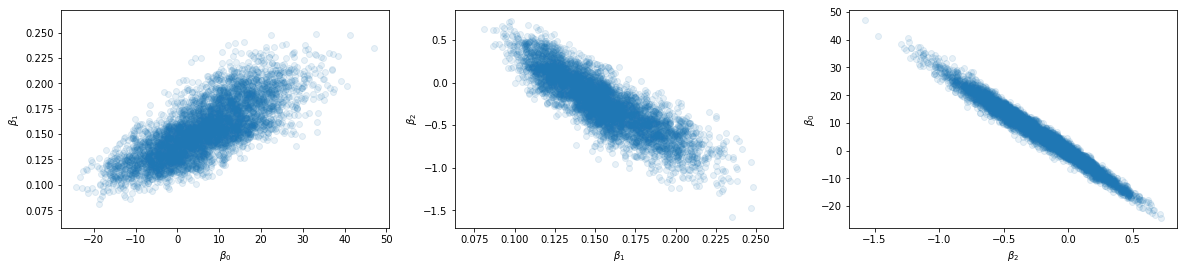

In [18]:
plt.figure(figsize=(20,4))

plt.subplot(131)
plt.scatter(beta_0, beta_1, alpha=0.1)
_ = plt.xlabel(r'$\beta_0$')
_ = plt.ylabel(r'$\beta_1$')

plt.subplot(132)
plt.scatter(beta_1, beta_2, alpha=0.1)
_ = plt.xlabel(r'$\beta_1$')
_ = plt.ylabel(r'$\beta_2$')

plt.subplot(133)
plt.scatter(beta_2, beta_0, alpha=0.1)
_ = plt.xlabel(r'$\beta_2$')
_ = plt.ylabel(r'$\beta_0$')

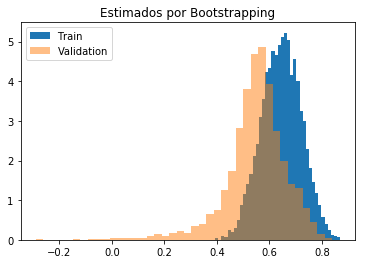

In [19]:
_ = plt.hist(r2_train, bins=40, density=True, label='Train')
_ = plt.hist(r2_validation, bins=40, alpha=0.5, density=True, label='Validation')

plt.title("Estimados por Bootstrapping")
plt.legend()

Y de esta manera podemos estimar los valores medios de los parámetros

In [20]:
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))

beta 0 6.247571085160462 +/- 10.39124978498368
beta 1 0.15406980557672856 +/- 0.027593336308716764
beta 2 -0.22802458995494868 +/- 0.34034855063038266


Y entonces, que diferencias hay entre training, validation and test?

- training: datos para encontrar los parámetros del modelo, dado un método estadístico. En este caso los beta del modelo lineal (modelo) con mínimos cuadrados (método).
- validation: datos para tomar decisiones sobre el método estadístico y, en algunos casos, el modelo mismo. 
- test: datos independientes para medir el rendimiento de un modelo y un método estadístico determinado.

# Ejercicio 7.1

Haga un ejercicio de bootstrap sobre el modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` para 
estimar los valores medios e incertidumbres. ¿Cuáles de los betas correspondientes son consistentes con cero?

In [21]:
X = data[['Horsepower', 'Turn.circle', 'MPG.highway']]
Y = data['Price'].values.reshape(-1,1)

n_boot = 5000 #Número de veces que se hará bootstrap.
#Arreglos que contendrán los coeficientes encontrados en cada iteración.
beta_0 = np.ones(n_boot)
beta_1 = np.ones(n_boot)
beta_2 = np.ones(n_boot)
beta_3 = np.ones(n_boot)

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    #Se dividen los datos en train y validation aunque en este caso no se utilice validation.
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y,
                                                                                        test_size=0.5)
    linear.fit(X_train, Y_train)
    beta_0[i] = linear.intercept_[0]
    beta_1[i] = linear.coef_[0][0]
    beta_2[i] = linear.coef_[0][1]
    beta_3[i] = linear.coef_[0][2]
    

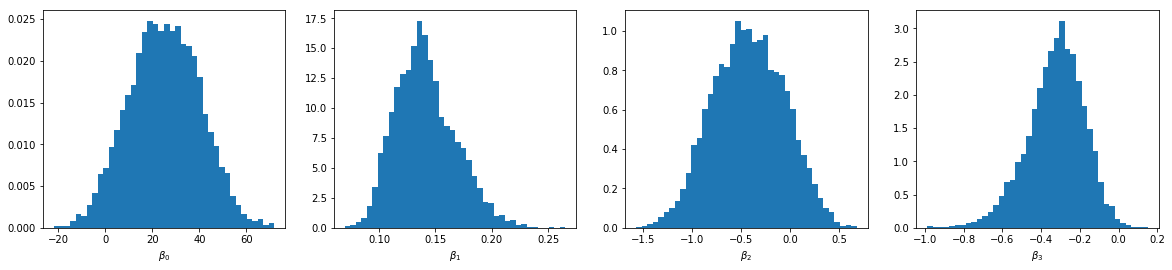

In [22]:
#Se grafican los histogramas de los coeficientes. Aquellos correspondientes a las variables
#que muestren una densidad significativa en cero son los consistentes con cero.
plt.figure(figsize=(20,4))

plt.subplot(141)
_ = plt.hist(beta_0, bins=40, density = True)
_ = plt.xlabel(r'$\beta_0$')

plt.subplot(142)
_ = plt.hist(beta_1, bins=40, density = True)
_ = plt.xlabel(r'$\beta_1$')

plt.subplot(143)
_ = plt.hist(beta_2, bins=40, density = True)
_ = plt.xlabel(r'$\beta_2$')

plt.subplot(144)
_ = plt.hist(beta_3, bins=40, density = True)
_ = plt.xlabel(r'$\beta_3$')

Según los histogramas obtenidos $\beta_2$ es consistente con cero.

In [38]:
#Medias e incertidumbres importantes para comparar con el siguiente ejercicio
print('beta 0 {} +/- {}'.format(beta_0.mean(), beta_0.std() ))
print('beta 1 {} +/- {}'.format(beta_1.mean(), beta_1.std() ))
print('beta 2 {} +/- {}'.format(beta_2.mean(), beta_2.std() ))
print('beta 3 {} +/- {}'.format(beta_3.mean(), beta_3.std() ))

beta 0 25.12419821951393 +/- 15.06866988242527
beta 1 0.14124921205627372 +/- 0.026695863979873592
beta 2 -0.4225876519667194 +/- 0.36554566041433556
beta 3 -0.3259588487242932 +/- 0.14639203105632603


# Ejercicio 7.2

Para el mismo modelo lineal con variables `Horsepower`, `Turn.circle` y `MPG.highway` utilice MCMC para encontrar P(beta|datos).
¿Cómo se relacionan las distribuciones de los beta encontrados con bootstraping y con MCMC? 
¿Cómo se relacionan los valores medios y las incertidumbres?

In [28]:
X = np.array(data[['Horsepower', 'Turn.circle', 'MPG.highway']])
y = np.array(data['Price'])
sigma = np.std(y)
sigma_y = np.array([sigma for i in range(len(y))]) #Tomo que todos los datos de Price tienen el
                                                   #mismo sigma, el dado por los datos.
n = len(X[0]) #Número de variables
N = 10000 #Número de iteraciones que se realizarán.

In [29]:
def model(x, param): #El modelo es el lineal, y = beta0 + beta1*x1 + beta2*x2...
    y = param[0]
    for i in range(n):
        y += param[i+1]*x[:,i] #Los datos estan organizados de manera que distintas filas son distintas
                               #observaciones y distinas columnas son distintas variables, por eso cojo
                               #una columna a la vez, x[:,i]
    return y

#La likelihood de siempre
def loglikelihood(x_obs, y_obs, sigma_y_obs, param):
    d = y_obs -  model(x_obs, param)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d
    
#De nuevo propongo un prior uniforme, y por sencillez, asumo que los coeficientes en valor absoluto
#deben ser menores a 60 (por los histogramas obtenidos con bootstrap).
def logprior(param):
    p = -np.inf
    mayor = np.amax(np.absolute(param))
    if mayor < 60:
        p = 0.0
    return p

#En vez de tener una lista para cada coeficiente, los almaceno todo en una matriz que al final de
#todas las iteraciones será de tamaño N x (n + 1), entonces columnas distintas representas coeficientes
#distintos.
param_matrix = [np.zeros(n+1)]
param_matrix.append(np.ones(n+1))
logposterior = [loglikelihood(X, y, sigma_y, param_matrix[0]) + logprior(param_matrix[0])]

sigma_delta = [5.0, 0.01, 0.2, 0.1] #Los pongo así a ojo, guiandome otra vez por los histogramas
                                    #de bootstrap, pues se puede ver que no sirve poner un mismo
                                    #delta para todos.

for i in range(1,N):
    propuesta  = param_matrix[i-1] + np.array([np.random.normal(loc=0.0, scale=sigma_delta[i]) 
                                               for i in range(n+1)])

    logposterior_viejo = loglikelihood(X, y, sigma_y, param_matrix[i-1]) + logprior(param_matrix[i-1])
    logposterior_nuevo = loglikelihood(X, y, sigma_y, propuesta) + logprior(propuesta)

    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        param_matrix.append(propuesta)
        logposterior.append(logposterior_nuevo)
    else:
        param_matrix.append(param_matrix[i-1])
        logposterior.append(logposterior_viejo)
param_matrix = np.array(param_matrix)
logposterior = np.array(logposterior)

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: overflow encountered in exp


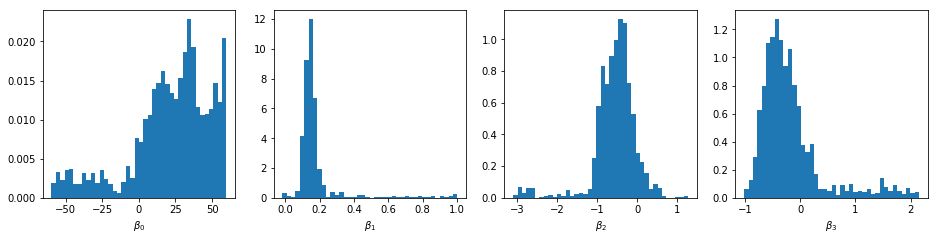

In [36]:
#Grafico histogramas de los coeficientes.
plt.figure(figsize = (20,20))

for i in range(n+1):
    plt.subplot(5,5,i+1)
    _ = plt.hist(param_matrix[:,i], bins=40, density = True)
    _ = plt.xlabel(r'$\beta_{}$'.format(i))

Podemos ver que se parecen un poco a los de bootstrap.

In [39]:
#Medias e incertidumbres para el caso de MCMC
for i in range(n+1):
    print('beta {} {} +/- {}'.format(i, param_matrix[:,i].mean(), param_matrix[:,i].std() ))

beta 0 21.72902655086432 +/- 27.472223181568587
beta 1 0.1775906345760861 +/- 0.14243204128068593
beta 2 -0.5599919355200532 +/- 0.5377110925703179
beta 3 -0.1762828488946667 +/- 0.5776426612342378


Las medias se parecen pero las incertidumbres son considerablemente más grandes.

# Ejercicio 7.3

Construya un modelo lineal del precio como funcion de las siguientes variables.

```
k=['MPG.city', 'MPG.highway', 'EngineSize', 
   'Horsepower', 'RPM', 'Rev.per.mile',
   'Fuel.tank.capacity', 'Passengers', 'Length',
   'Wheelbase', 'Width', 'Turn.circle', 'Weight']
```

¿Cuáles son las beta correspondientes **no** son consistentes con ser cero? ¿Cuál es el modelo lineal que queda luego de descartar
estas variables sin importancia?

In [30]:
#Es análogo al 7.1 solo que ahora se usan más variables.
X = data[['MPG.city', 'MPG.highway', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
          'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width', 'Turn.circle', 'Weight']]
Y = data['Price'].values.reshape(-1,1)

n_boot = 5000
betas = np.ones((14, n_boot)) #Esta vez los coeficientes los guardo en una matriz de tamaño
                              #14 x n_boot.

linear = sklearn.linear_model.LinearRegression()
for i in range(n_boot):
    X_train, X_validation, Y_train, Y_validation = sklearn.model_selection.train_test_split(X, Y,     
                                                                                        test_size=0.5)
    linear.fit(X_train, Y_train)
    betas[0,i] = linear.intercept_[0]
    #Lleno la columna i del arreglo betas.
    for j in range(1,14):
        betas[j,i] = linear.coef_[0][j-1]

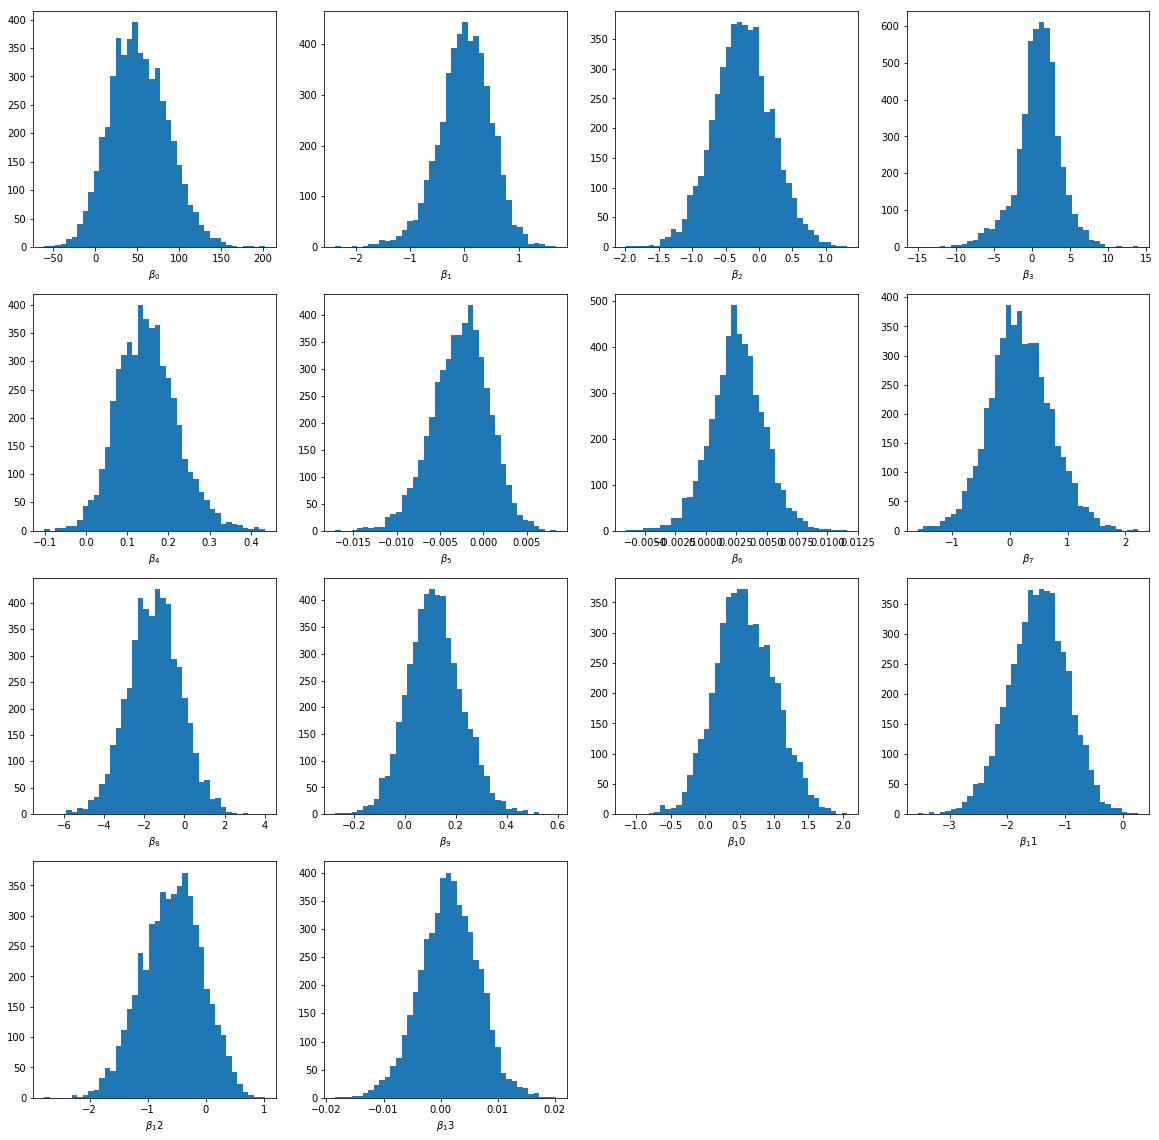

In [31]:
#Grafico histogramas de los coeficientes.
plt.figure(figsize = (20,20))

for i in range(14):
    plt.subplot(4,4,i+1)
    _ = plt.hist(betas[i,:], bins=40)
    _ = plt.xlabel(r'$\beta_{}$'.format(i))

Según los histogramas obtenidos $\beta_4$ y $\beta_{11}$ son los únicos que no son consistentes con cero. Por ende el modelo sería:  
*Price* = $\beta_0$ + $\beta_4*$*Horsepower* + $\beta_{11}*$*Width*